Day 2

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.listdir('Mats')

['2023-nwbc-data.csv',
 '2023-nwbc-raw-data.csv',
 '2023-nwbc-reds-updated.csv',
 '2023-nwbc-reds.csv',
 '2023-nwbc-reds.xlsx',
 'nw-version-reds.xlsx']

In [3]:
df = pd.read_csv("/Baseball/Mats/2023-nwbc-reds.csv")

In [4]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,Total_Score,is_strike,is_reds_pitcher
0,FF,05-10-2022,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17,0,0
1,FF,05-10-2022,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis",17,0,0
2,SL,05-10-2022,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis",17,0,0
3,FF,05-10-2022,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis",17,1,0
4,FF,05-10-2022,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis",17,1,0


In [5]:
df['is_reds_pitcher'] = 0

In [6]:
(df
 .loc[((df['home_team'] == 'CIN') & 
       (df['inning_topbot'] == 'Top')) | 
       ((df['away_team'] == 'CIN') & 
        (df['inning_topbot'] == 'Bot')),
        'is_reds_pitcher' ]) = 1

In [7]:
df.head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,Total_Score,is_strike,is_reds_pitcher
0,FF,05-10-2022,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,Standard,133.0,0.0,-0.083,heart,0,"garcia, aramis",17,0,0
1,FF,05-10-2022,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,132.0,0.0,0.014,shadow,0,"garcia, aramis",17,0,0
2,SL,05-10-2022,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,Standard,216.0,0.0,0.011,waste,0,"garcia, aramis",17,0,0
3,FF,05-10-2022,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,Standard,133.0,0.0,-0.023,heart,0,"garcia, aramis",17,1,0
4,FF,05-10-2022,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,Standard,133.0,0.0,-0.017,heart,0,"garcia, aramis",17,1,0
5,FF,05-10-2022,93.8,2.33,5.50,"Hughes, Brandon",608703,676714,field_out,hit_into_play,...,Standard,126.0,0.0,-0.132,shadow,0,"reynolds, matt",17,0,0
6,FF,05-10-2022,94.5,2.25,5.47,"Hughes, Brandon",608703,676714,NaN,called_strike,...,Standard,124.0,0.0,-0.024,shadow,0,"reynolds, matt",17,1,0
7,FF,05-10-2022,92.8,2.48,5.40,"Hughes, Brandon",641584,676714,field_out,hit_into_play,...,Standard,130.0,0.0,-0.299,shadow,0,"fraley, jake",17,0,0
8,FF,05-10-2022,94.7,2.32,5.55,"Hughes, Brandon",641584,676714,NaN,ball,...,Standard,134.0,0.0,0.103,chase,0,"fraley, jake",17,0,0
9,SI,05-10-2022,93.4,2.36,5.41,"Hughes, Brandon",641584,676714,NaN,foul,...,Standard,132.0,0.0,-0.066,chase,0,"fraley, jake",17,1,0


In [8]:
df1 = df.loc[df['is_reds_pitcher']==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).mean()
df1 = df1.rename(columns={'is_strike':'avg'})

In [9]:
df1

,pitcher_name,pitch_name,avg
0,"Anderson, Chase",4-Seam Fastball,0.437500
1,"Anderson, Chase",Changeup,0.542857
2,"Anderson, Chase",Curveball,0.368421
3,"Anderson, Chase",Cutter,0.471910
4,"Anderson, Chase",Sinker,0.464286
...,...,...,...
141,"Zeuch, T.J.",Slider,0.373134
142,"Zimmer, Kyle",4-Seam Fastball,0.400000
143,"Zimmer, Kyle",Changeup,1.000000
144,"Zimmer, Kyle",Curveball,1.000000


Day 3

In [10]:
df2 = df.loc[df['is_reds_pitcher']==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count()
df2 = df2.rename(columns={'is_strike':'count'})

In [11]:
df2

,pitcher_name,pitch_name,count
0,"Anderson, Chase",4-Seam Fastball,128
1,"Anderson, Chase",Changeup,140
2,"Anderson, Chase",Curveball,38
3,"Anderson, Chase",Cutter,89
4,"Anderson, Chase",Sinker,56
...,...,...,...
141,"Zeuch, T.J.",Slider,67
142,"Zimmer, Kyle",4-Seam Fastball,5
143,"Zimmer, Kyle",Changeup,1
144,"Zimmer, Kyle",Curveball,1


In [12]:
df3 = df1.merge(df2,  on=['pitcher_name', 'pitch_name'])

# in case the 3rd column is still is_strike for both df1 and df2
# df3 = df1.merge(df2, on=['pitcher_name', 'pitch_name']) else jest df2 but is a gud pratice

In [13]:
df3

,pitcher_name,pitch_name,avg,count
0,"Anderson, Chase",4-Seam Fastball,0.437500,128
1,"Anderson, Chase",Changeup,0.542857,140
2,"Anderson, Chase",Curveball,0.368421,38
3,"Anderson, Chase",Cutter,0.471910,89
4,"Anderson, Chase",Sinker,0.464286,56
...,...,...,...,...
141,"Zeuch, T.J.",Slider,0.373134,67
142,"Zimmer, Kyle",4-Seam Fastball,0.400000,5
143,"Zimmer, Kyle",Changeup,1.000000,1
144,"Zimmer, Kyle",Curveball,1.000000,1


In [14]:
pitcher_name = 'Castillo, Luis'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name ]

In [15]:
df_plt

,pitcher_name,pitch_name,avg,count
10,"Castillo, Luis",4-Seam Fastball,0.543668,458
11,"Castillo, Luis",Changeup,0.430894,369
12,"Castillo, Luis",Sinker,0.449180,305
13,"Castillo, Luis",Slider,0.508361,299


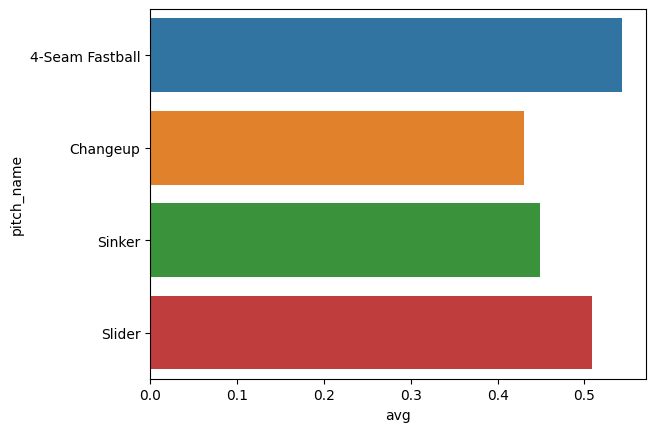

In [16]:
sns.barplot(data=df_plt, x='avg', y='pitch_name')
plt.show()

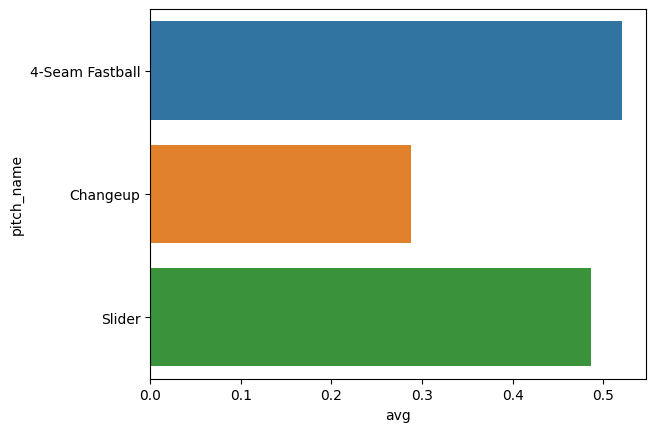

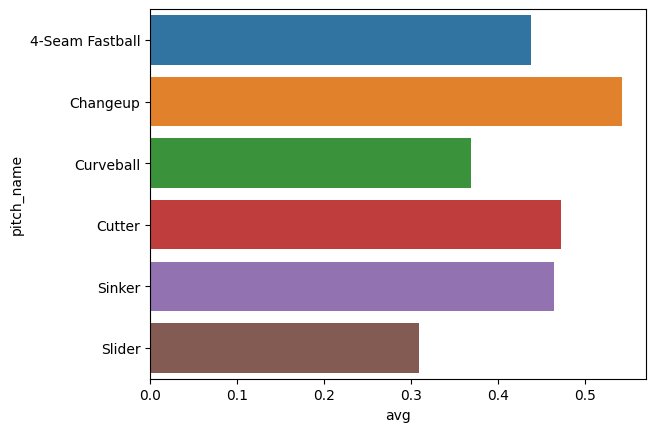

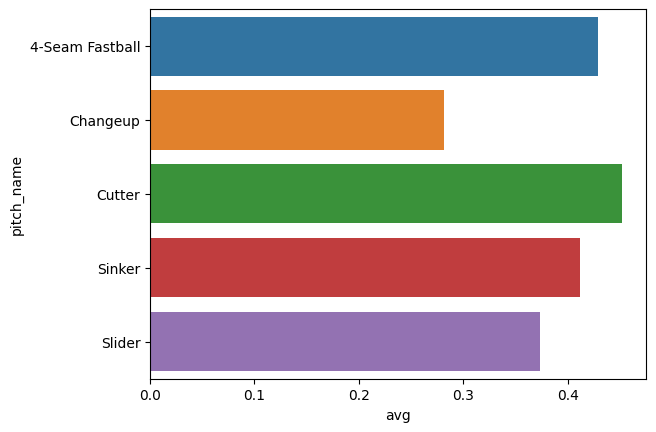

In [17]:
pitcher_name = 'Greene, Hunter'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name ]
sns.barplot(data=df_plt, x='avg', y='pitch_name')
plt.show()

pitcher_name = 'Anderson, Chase'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name ]
sns.barplot(data=df_plt, x='avg', y='pitch_name')
plt.show()

pitcher_name = 'Zeuch, T.J.'
df_plt = df3.loc[df3['pitcher_name']==pitcher_name ]
sns.barplot(data=df_plt, x='avg', y='pitch_name')
plt.show()

Greene, Hunter


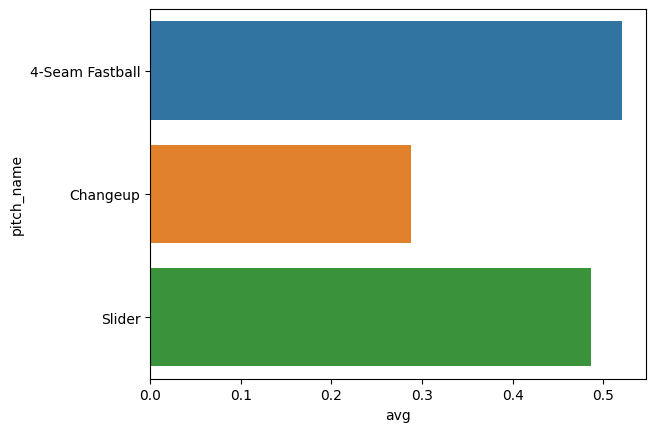

Anderson, Chase


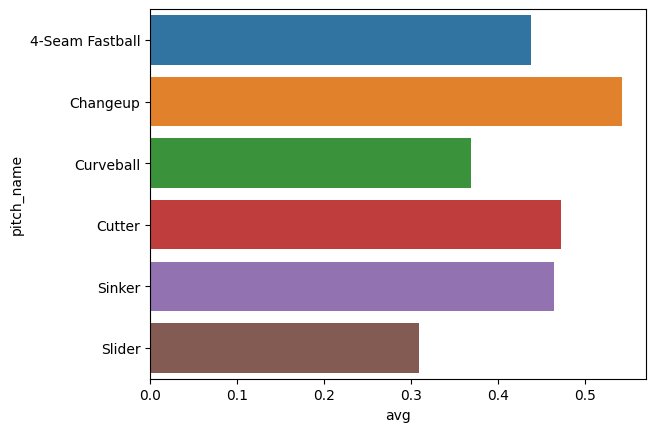

Zeuch, T.J.


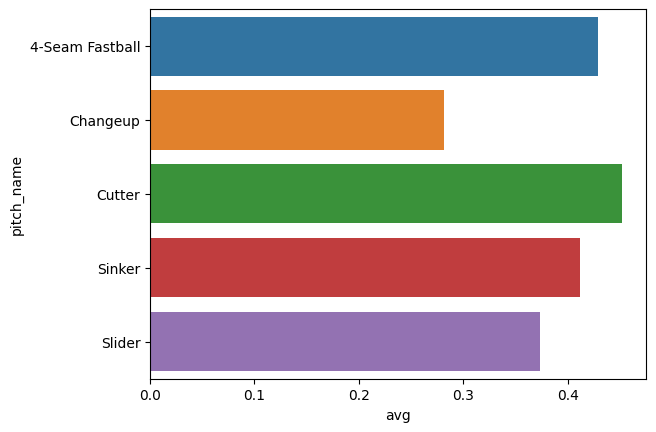

Castillo, Luis


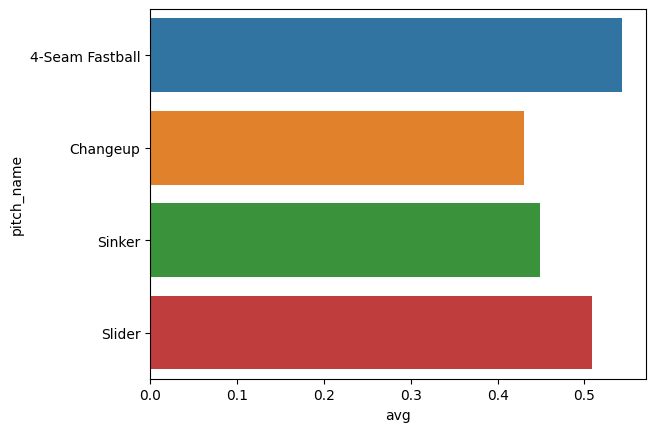

In [18]:
pitchers = ['Greene, Hunter', 'Anderson, Chase', 'Zeuch, T.J.', 'Castillo, Luis']

for pitcher in pitchers:
    print(pitcher)
    df_plt = df3.loc[df3['pitcher_name']==pitcher ]
    sns.barplot(data=df_plt, x='avg', y='pitch_name')
    plt.show()

In [19]:
df3['pitcher_name'].unique()

array(['Anderson, Chase', 'Ashcraft, Graham', 'Castillo, Luis',
       'Cessa, Luis', 'Cruz, Fernando', 'Detwiler, Ross',
       'Diehl, Phillip', 'Dowdy, Kyle', 'Duarte, Daniel',
       'Dugger, Robert', 'Dunn, Justin', 'Díaz, Alexis',
       'Espinal, Raynel', 'Farmer, Buck', 'Farrell, Luke', 'Gibaut, Ian',
       'Greene, Hunter', 'Gutierrez, Vladimir', 'Hendrix, Ryan',
       'Hoffman, Jeff', 'Kuhnel, Joel', 'Law, Derek', 'Lodolo, Nick',
       'Lopez, Alejo', 'Mahle, Tyler', 'Minor, Mike', 'Moreta, Dauri',
       'Overton, Connor', 'Reynolds, Matt', 'Sanmartin, Reiver',
       'Santillan, Tony', 'Schrock, Max', 'Sims, Lucas', 'Solomon, Jared',
       'Strickland, Hunter', 'Warren, Art', 'Wilson, Justin',
       'Zeuch, T.J.', 'Zimmer, Kyle'], dtype=object)

In [20]:
##for pitcher in df3['pitcher_name'].unique():
##    print(pitcher)
##    df_plt = df3.loc[df3['pitcher_name']==pitcher ]
##    sns.barplot(data=df_plt, x='avg', y='pitch_name')
##    plt.show()

HOMEWORK

Question 1

What is the average amount of strikes thrown in each attack_zone? Rename attack_zone to Attack Zones. Note: this is overall, not specific for each pitcher.

In [21]:
df4 = df.loc[:, ['is_strike', 'attack_zone']].groupby(['attack_zone'], as_index=False).mean()
df4 = df4.rename(columns={'is_strike':'avg'})
df4 = df4.rename(columns={'attack_zone':'Attack Zone'})

In [22]:
df4

,Attack Zone,avg
0,chase,0.200415
1,heart,0.677623
2,shadow,0.564956
3,waste,0.136628


Question 2

For each Reds pitcher how many times did they throw into each attack_zone between release_speed of 80 and 90? What were the average strikes in each attack_zone between 80 and 90 release_speed? Merge the number of times thrown into each attack zone and the average strikes in each attack zone for each pitcher into one dataframe.

In [23]:
df_reds = (df.
           loc[ (df['is_reds_pitcher'] == 1) & 
               ((df['release_speed'] >= 80) & 
                (df['release_speed'] <= 90)), 
                ['pitcher_name', 'attack_zone', 'is_strike'] ]
                .groupby(['pitcher_name', 'attack_zone'], as_index=False).count()) 

df_reds = df_reds.rename(columns={'is_strike': 'count'})

##or (df['is_reds_pitcher'] == 1) & (df['release_speed'].between(80,90) )

df_reds_m = (df.
           loc[ (df['is_reds_pitcher'] == 1) & 
               ((df['release_speed'] >= 80) & 
                (df['release_speed'] <= 90)), 
                ['pitcher_name', 'attack_zone', 'is_strike'] ]
                .groupby(['pitcher_name', 'attack_zone'], as_index=False).mean()) 

df_reds_m = df_reds_m.rename(columns={'is_strike': 'mean'})


##df2 = df.loc[df['is_reds_pitcher']==1, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count()
##df2 = df2.rename(columns={'is_strike':'count'}))

In [24]:
df_reds

,pitcher_name,attack_zone,count
0,"Anderson, Chase",chase,70
1,"Anderson, Chase",heart,42
2,"Anderson, Chase",shadow,113
3,"Anderson, Chase",waste,16
4,"Ashcraft, Graham",chase,128
...,...,...,...
142,"Zeuch, T.J.",heart,30
143,"Zeuch, T.J.",shadow,49
144,"Zeuch, T.J.",waste,15
145,"Zimmer, Kyle",chase,2


In [25]:
df_reds_m

,pitcher_name,attack_zone,mean
0,"Anderson, Chase",chase,0.228571
1,"Anderson, Chase",heart,0.809524
2,"Anderson, Chase",shadow,0.584071
3,"Anderson, Chase",waste,0.000000
4,"Ashcraft, Graham",chase,0.328125
...,...,...,...
142,"Zeuch, T.J.",heart,0.666667
143,"Zeuch, T.J.",shadow,0.408163
144,"Zeuch, T.J.",waste,0.000000
145,"Zimmer, Kyle",chase,1.000000


In [26]:
df_reds_hw = df_reds.merge(df_reds_m,  on=['pitcher_name', 'attack_zone'])
df_reds_hw

,pitcher_name,attack_zone,count,mean
0,"Anderson, Chase",chase,70,0.228571
1,"Anderson, Chase",heart,42,0.809524
2,"Anderson, Chase",shadow,113,0.584071
3,"Anderson, Chase",waste,16,0.000000
4,"Ashcraft, Graham",chase,128,0.328125
...,...,...,...,...
142,"Zeuch, T.J.",heart,30,0.666667
143,"Zeuch, T.J.",shadow,49,0.408163
144,"Zeuch, T.J.",waste,15,0.000000
145,"Zimmer, Kyle",chase,2,1.000000


Question 3

For each batter, what pitch types did they hit for home runs? For each pitcher, what is their most frequently thrown pitch type? Join batters and pitchers together on pitch type. After joining, check to see if the batter and the pitcher ever matched up against each other in this dataset -- make a new column that indicates if they did match up against each other or if they didn't. Note: the dataframe is going to be very large -- like +99000 rows

In [27]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estim

In [28]:
df['Home_Run'] = 0
df.loc[df['events'] == 'home_run', 'Home_Run'] = 1

In [29]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,batter,pitcher,events,description,...,spin_axis,delta_home_win_exp,delta_run_exp,attack_zone,swing,batter_name,Total_Score,is_strike,is_reds_pitcher,Home_Run
0,FF,05-10-2022,93.8,2.39,5.44,"Hughes, Brandon",605244,676714,field_out,hit_into_play,...,133.0,0.0,-0.083,heart,0,"garcia, aramis",17,0,0,0
1,FF,05-10-2022,93.3,2.30,5.51,"Hughes, Brandon",605244,676714,NaN,ball,...,132.0,0.0,0.014,shadow,0,"garcia, aramis",17,0,0,0
2,SL,05-10-2022,84.3,2.45,5.21,"Hughes, Brandon",605244,676714,NaN,ball,...,216.0,0.0,0.011,waste,0,"garcia, aramis",17,0,0,0
3,FF,05-10-2022,93.8,2.32,5.48,"Hughes, Brandon",605244,676714,NaN,called_strike,...,133.0,0.0,-0.023,heart,0,"garcia, aramis",17,1,0,0
4,FF,05-10-2022,94.1,2.34,5.54,"Hughes, Brandon",605244,676714,NaN,swinging_strike,...,133.0,0.0,-0.017,heart,0,"garcia, aramis",17,1,0,0


In [30]:
df_batter = (df
             .loc[ df['Home_Run'] == 1, 
                  ['batter_name', 'pitch_name', 'Home_Run'] ]
                  .groupby(['batter_name', 'pitch_name'], 
                           as_index=False).count())

# I forgor to add count in batters

df_pitcher = (df
              .loc[ : , 
                   ['pitcher_name', 'pitch_name', 'Home_Run'] ]
                   .groupby(['pitcher_name', 'pitch_name'], 
                            as_index=False).count())
_df_pitcher = df_pitcher.loc[:, ['pitcher_name','Home_Run']].groupby(['pitcher_name'], as_index=False).max()
df_pitcher = df_pitcher.merge(_df_pitcher)

#df_pitcher = df_pitcher.loc[df_pitcher.groupby('pitcher_name')['Home_Run'].idxmax()]  (sumthing was wrong with it... had like 100 rows of missing data)

# df_pitcher = df.locp[:, ['pitcher_name', 'pitch_name', 'is_strike]].groupby(['pitcher_name'], as_index=False).max()


df_pitcher = df_pitcher.rename(columns={'Home_Run': 'pitch_count'})

In [31]:
df_batter

,batter_name,pitch_name,Home_Run
0,"adames, willy",4-Seam Fastball,1
1,"adames, willy",Curveball,1
2,"adames, willy",Cutter,2
3,"adames, willy",Slider,4
4,"aguilar, jesús",Cutter,1
...,...,...,...
254,"wong, kolten",4-Seam Fastball,3
255,"wong, kolten",Slider,1
256,"yastrzemski, mike",4-Seam Fastball,1
257,"yelich, christian",4-Seam Fastball,2


In [32]:
df_pitcher

,pitcher_name,pitch_name,pitch_count
0,"Abreu, Albert",Sinker,30
1,"Adam, Jason",Changeup,10
2,"Adon, Joan",4-Seam Fastball,73
3,"Alcantara, Sandy",Sinker,38
4,"Alexander, Jason",Sinker,97
...,...,...,...
363,"Wright, Kyle",Curveball,31
364,"Yajure, Miguel",Curveball,20
365,"Zabala, Aneurys",4-Seam Fastball,19
366,"Zeuch, T.J.",Sinker,102


In [33]:
df_hw = df_batter.merge(df_pitcher,  on=['pitch_name'])
df_hw

,batter_name,pitch_name,Home_Run,pitcher_name,pitch_count
0,"adames, willy",4-Seam Fastball,1,"Adon, Joan",73
1,"adames, willy",4-Seam Fastball,1,"Anderson, Ian",30
2,"adames, willy",4-Seam Fastball,1,"Anderson, Tyler",47
3,"adames, willy",4-Seam Fastball,1,"Baker, Bryan",11
4,"adames, willy",4-Seam Fastball,1,"Bautista, Félix",13
...,...,...,...,...,...
20296,"higgins, p. j.",Other,1,"Simmons, Andrelton",21
20297,"morel, christopher",Other,1,"Hager, Jake",4
20298,"morel, christopher",Other,1,"Reynolds, Matt",20
20299,"morel, christopher",Other,1,"Schrock, Max",26


In [34]:
df_matchup = df.loc[:, ['batter_name', 'pitcher_name']].drop_duplicates()
df_matchup['real_matchup'] = 1

df_matchup = df_hw.merge(df_matchup, how='left')
df_matchup['real_matchup'] = df_matchup['real_matchup'].fillna(0).astype(int)

df_matchup.head(50)
#how command is for like how you wan the merge to happen
#fillna to fill empty values
#astype for integer values instead of float 

,batter_name,pitch_name,Home_Run,pitcher_name,pitch_count,real_matchup
0,"adames, willy",4-Seam Fastball,1,"Adon, Joan",73,0
1,"adames, willy",4-Seam Fastball,1,"Anderson, Ian",30,0
2,"adames, willy",4-Seam Fastball,1,"Anderson, Tyler",47,0
3,"adames, willy",4-Seam Fastball,1,"Baker, Bryan",11,0
4,"adames, willy",4-Seam Fastball,1,"Bautista, Félix",13,0
5,"adames, willy",4-Seam Fastball,1,"Bazardo, Eduard",4,0
6,"adames, willy",4-Seam Fastball,1,"Bednar, David",47,0
7,"adames, willy",4-Seam Fastball,1,"Beeks, Jalen",15,0
8,"adames, willy",4-Seam Fastball,1,"Bickford, Phil",28,0
9,"adames, willy",4-Seam Fastball,1,"Bieber, Shane",35,0


Question 4

Make a bar plot for 5 players and plot the amount of times they have thrown each pitch type.

In [35]:
df3['pitcher_name'].unique()

array(['Anderson, Chase', 'Ashcraft, Graham', 'Castillo, Luis',
       'Cessa, Luis', 'Cruz, Fernando', 'Detwiler, Ross',
       'Diehl, Phillip', 'Dowdy, Kyle', 'Duarte, Daniel',
       'Dugger, Robert', 'Dunn, Justin', 'Díaz, Alexis',
       'Espinal, Raynel', 'Farmer, Buck', 'Farrell, Luke', 'Gibaut, Ian',
       'Greene, Hunter', 'Gutierrez, Vladimir', 'Hendrix, Ryan',
       'Hoffman, Jeff', 'Kuhnel, Joel', 'Law, Derek', 'Lodolo, Nick',
       'Lopez, Alejo', 'Mahle, Tyler', 'Minor, Mike', 'Moreta, Dauri',
       'Overton, Connor', 'Reynolds, Matt', 'Sanmartin, Reiver',
       'Santillan, Tony', 'Schrock, Max', 'Sims, Lucas', 'Solomon, Jared',
       'Strickland, Hunter', 'Warren, Art', 'Wilson, Justin',
       'Zeuch, T.J.', 'Zimmer, Kyle'], dtype=object)

Mahle, Tyler


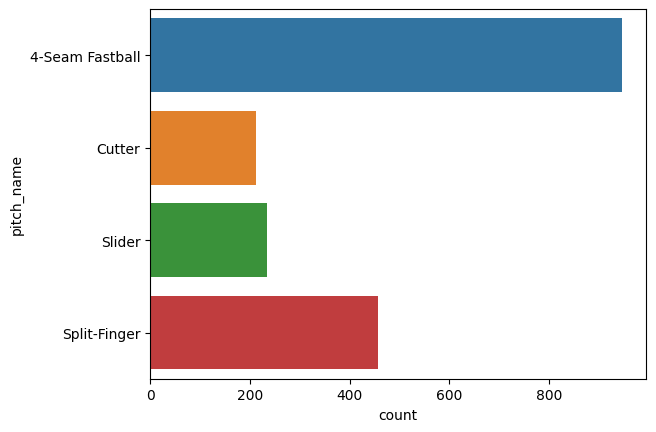

Gutierrez, Vladimir


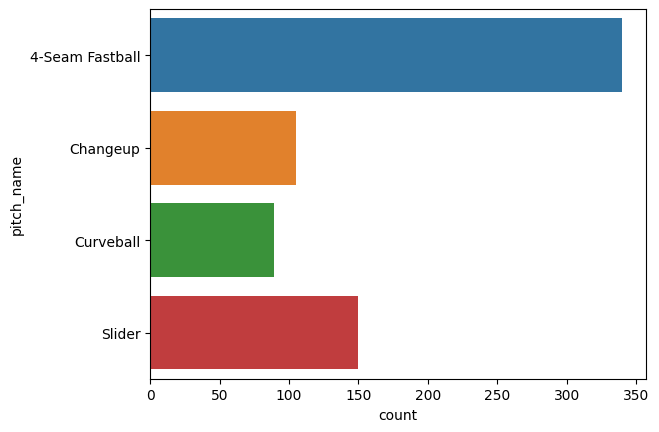

Dunn, Justin


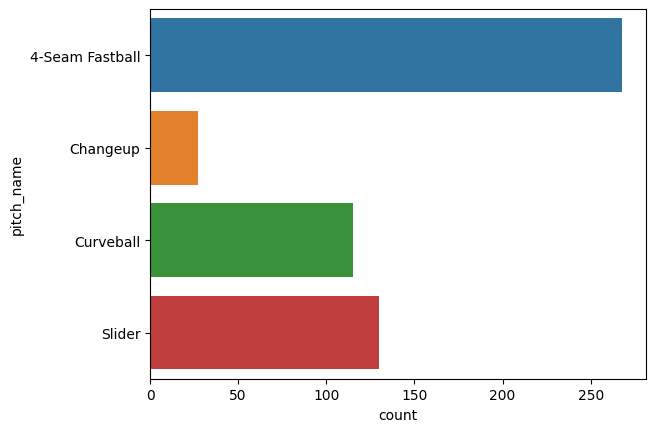

Moreta, Dauri


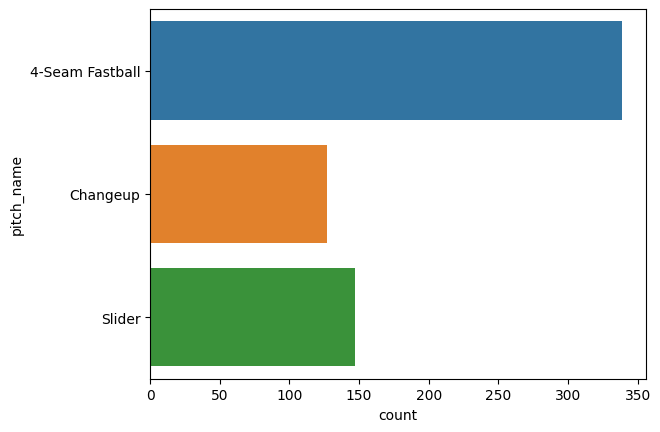

Strickland, Hunter


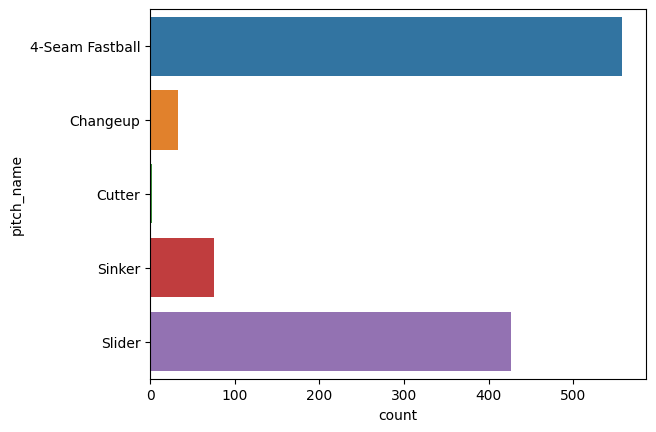

In [36]:
pitchers = ['Mahle, Tyler', 'Gutierrez, Vladimir', 'Dunn, Justin', 'Moreta, Dauri', 'Strickland, Hunter']

for pitcher in pitchers:
    print(pitcher)
    df_plt = df3.loc[df3['pitcher_name']==pitcher ]
    sns.barplot(data=df_plt, x='count', y='pitch_name')
    plt.show()


# OR

##pitchers = ['Thompson, Keegan', 'Farmer, Buck',
##            'Cruz, Fernando', 'Assad, Javier',
##            'Gibaut, Ian']

##df_plt = (df
##          .loc[df['pitcher_name'].isin(pitchers),
##           ['pitcher_name', 'pitch_name', 'is_strike']]
##          .groupby(['pitcher_name', 'pitch_name'], as_index=False)
##          .count())

##df_plt = df_plt.rename(columns={'is_strike':'count'})

##for pitcher in pitchers:
##  print(pitcher)
##  sns.barplot(data=df_plt.loc[df_plt['pitcher_name']==pitcher], x='count', y='pitch_name')
##  plt.show()

Question 5

Use sns.scatterplot() and plot avg as "x" and count as "y". You can do this with the entire dataset or use a subsample of data (i.e. if you wanted to only look at Hunter Greene, that would be a "subsample" of df3).

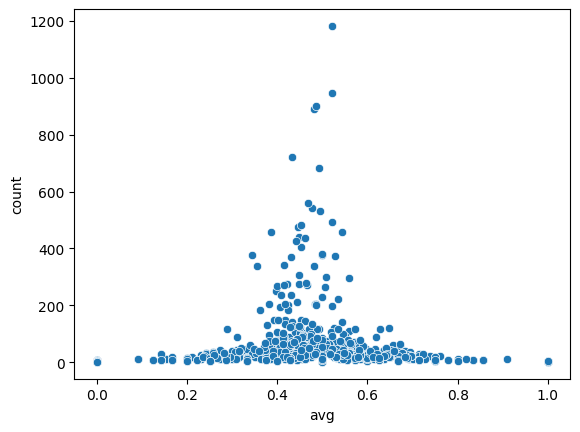

In [37]:
df1 = df.loc[:, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).count()
df2 = df.loc[:, ['pitcher_name', 'pitch_name', 'is_strike']].groupby(['pitcher_name', 'pitch_name'], as_index=False).mean()

df1 = df1.rename(columns={'is_strike':'count'})
df2 = df2.rename(columns={'is_strike':'avg'})
df_plt = df1.merge(df2)

sns.scatterplot(data=df_plt, x='avg', y='count')
plt.show()



## Wot I did which is wrong?

##pitchers = ['Mahle, Tyler', 'Gutierrez, Vladimir', 'Dunn, Justin', 'Moreta, Dauri', 'Strickland, Hunter']

##for pitcher in pitchers:
##    print(pitcher)
##    df_plt = df3.loc[df3['pitcher_name']==pitcher ]
##    sns.scatterplot(data=df_plt, x='avg', y='count')
##    plt.show()

Bonus Questions

Bonus questions (if it's too hard or takes a lot of time, do this some other time! kind of more like small projects...)

Bonus 1: What's each Reds pitcher's best and worst pitch type? Hint: more strikes are "good" for the pitcher

Bonus 2: Using everything you know from the last 3 days, pick a pitcher and describe their ability to throw strikes. You can use any columns for your analysis. Some columns that could be helpful: pitch_name, attack_zone, make a column for strikes, make a column for balls, make a column for different hit types in events (i.e. a home run or hit column), make a column for your favorite team, make a column for left handed pitcher vs right handed pitchers (or left handed batters/right handed batters). Pick a few interesting columns and describe a pitcher's strike rate. Visualize it if possible.